# spaCy

## Basics of spaCy

In [1]:
import spacy

txt = "The tallest living man is 37-year-old Sultan Kosen, from Turkey, who is 8 feet, 2.8 inches, who set the record in 2009."

# Create the Language object
# convention to name any loaded language models 'nlp' in spaCy
nlp = spacy.load("en_core_web_sm")
nlp

In [2]:
# this is how we create a doc object
doc = nlp(txt)
doc

The tallest living man is 37-year-old Sultan Kosen, from Turkey, who is 8 feet, 2.8 inches, who set the record in 2009.

In [3]:
# a doc object is a convention and an iterator
# slicing and indexing notations can be used to extract individual tokens
for token in doc[:5]:
    print(token)
print(f'\nText length: {len(doc)}')
print(type(doc[0]))

The
tallest
living
man
is

Text length: 31
<class 'spacy.tokens.token.Token'>


In [4]:
# if more than one token is extracted we have a span object
span = doc[:5]
print(type(span))

span.text

<class 'spacy.tokens.span.Span'>


'The tallest living man is'

In [5]:
# spaCy is memory efficient so token and span are just views of doc object there is no duplication
# There are also 6 prebuilt in lexical attributes
print("Index:  ", [token.i for token in doc[3:10]])
print("Text:  ", [token.text for token in doc[3:10]])
print("is_alpha:  ", [token.is_alpha for token in doc[3:10]])
print("is_punct:  ", [token.is_punct for token in doc[3:10]])
# like_num recognizes both literal and lettered numbers
print("like_num:  ", [token.like_num for token in doc[3:10]])
# returns base word stripped from any suffixes, prefixes, tense, or other grammatical attributes
print("Base word: ", [token.lemma_ for token in doc[3:10]])

Index:   [3, 4, 5, 6, 7, 8, 9]
Text:   ['man', 'is', '37', '-', 'year', '-', 'old']
is_alpha:   [True, True, False, False, True, False, True]
is_punct:   [False, False, False, True, False, True, False]
like_num:   [False, False, True, False, False, False, False]
Base word:  ['man', 'be', '37', '-', 'year', '-', 'old']


## Architecture and core data structures

In [6]:
import spacy
# we load in a language object which are pre-trained on millions of text instances
# available in 22 languages
nlp = spacy.load("en_core_web_md")

type(nlp)

spacy.lang.en.English

In [7]:
# language models can be directly imported from the lan sub-module
from spacy.lang.en import English
from spacy.lang.es import Spanish

nlp = English()

print(type(nlp))

txt = """The original name for the search engine Google was Backrub. 
         It was renamed Google after the googol, 
         which is the number one followed by 100 zeros."""

doc = nlp(txt)

<class 'spacy.lang.en.English'>


In [8]:
# after processing text the words and punct are stored in the vocab object of nlp
# vocab is shared between docs so all new words are stored in the same object
print(f'nlp vocab: {type(nlp.vocab)}')
print(f'doc vocab: {type(doc.vocab)}')

nlp vocab: <class 'spacy.vocab.Vocab'>
doc vocab: <class 'spacy.vocab.Vocab'>


In [13]:
print(type(nlp.vocab.strings))
# spaCy communicates in hashes and has a two way lookup table called stringstore
google = nlp.vocab.strings["google"]
print(f'Hash: {google}')
print(f'String: {nlp.vocab.strings[google]}')

<class 'spacy.strings.StringStore'>
Hash: 1988622737398120358
String: google


In [16]:
# when tokens enter Vocab they lose context-specific info and become a lexeme
lexeme = nlp.vocab["google"]
type(lexeme)

spacy.lexeme.Lexeme

In [17]:
# does not contain POS tags or morphological dependencies but offer lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_digit)

google 1988622737398120358 False


### Manual Doc Object creation

In [19]:
# you can create docs manually by importing the Doc class from tokens module
from spacy.lang.en import English
from spacy.tokens import Doc

nlp = English()

words = ["I", "love", "Barcelona", "!"]
spaces = [True, True, False, False]

# we combine the words and spaces to create a text doc
# doc requires a vocab list before being able to create a doc
doc = Doc(nlp.vocab, words=words, spaces=spaces)
doc

I love Barcelona!

### Manual Span Object Creation

In [23]:
# spans are also a class of their own
doc = nlp(txt)

span = doc[:10]
print(type(span))
print(span.text)
print(span.start, span.end)

<class 'spacy.tokens.span.Span'>
The original name for the search engine Google was Backrub
0 10


In [24]:
# you can also manually create span objects
from spacy.tokens import Span

span = Span(doc, 0, 10)
span.text

'The original name for the search engine Google was Backrub'

## Named Entity Recognition

In [90]:
# We use spaCy to perform name entity extraction/recognition

txt = """Cleopatra wasn't actually Egyptian! 
         As far as historians can tell, Egypt's 
         famous femme fatal was actually Greek!. 
         She was a descendant of Alexander the Great's
         Macedonian general Ptolemy"""

nlp = spacy.load("en_core_web_md")

doc = nlp(txt)

for ent in doc.ents:
    print(f'{ent.text:<20}    {ent.label_:<20}')

Cleopatra               PERSON              
Egyptian                NORP                
Egypt                   GPE                 
Greek                   NORP                
Alexander the Great's    ORG                 
Macedonian              NORP                
Ptolemy                 PERSON              


In [34]:
# explains the entity labels provided
print(spacy.explain('ORG'))
print(spacy.explain('GPE'))

Companies, agencies, institutions, etc.
Countries, cities, states


In [91]:
# we can also display an entity tagger instead of straight text
from spacy import displacy

displacy.render(doc, style="ent")

In [93]:
# Alexander the Great is mislabeled as an ORG instead of a person
# so we want to relabel it
from spacy.tokens import Span
alexander = Span(doc, 31, 34, label="PERSON")
print(alexander)

print(doc[31:35])
# to remove a entity we have to first convert it into a separate list and remove the desired value
# then we set the original doc.ents to the list to update the removed value
test = list(doc.ents)
del test[4]
doc.ents = test
print(doc.ents)
doc.set_ents([alexander], default="unmodified")
displacy.render(doc, style="ent")

Alexander the Great
Alexander the Great's
(Cleopatra, Egyptian, Egypt, Greek, Macedonian, Ptolemy)


## Predicting part-of-speech (POS) tags and syntatic dependicies

In [94]:
# spaCy offers a rich selection of tools for grammar analysis
txt = "The first footprints on the moon will remain there for a million years"

doc = nlp(txt)

print(
    f"{'Text':<20} {'Part-of-speech':<20} "
    f"{'Dependency':<20} {'Dependency text':<20}\n"
)

for token in doc:
    print(f"{token.text:<20} {token.pos_:<20} {token.dep_:<20} {token.head.text:<20}")

Text                 Part-of-speech       Dependency           Dependency text     

The                  DET                  det                  footprints          
first                ADJ                  amod                 footprints          
footprints           NOUN                 nsubj                remain              
on                   ADP                  prep                 footprints          
the                  DET                  det                  moon                
moon                 NOUN                 pobj                 on                  
will                 AUX                  aux                  remain              
remain               VERB                 ROOT                 remain              
there                ADV                  advmod               remain              
for                  ADP                  prep                 remain              
a                    DET                  quantmod             million     

In [96]:
# this may seem confusing but we can also use spaCy to explain the labels 

pos_tags = ["DET", "AUX", "ADP"]
dep_tags = ["amod", "nsubj", "nummod"]

for pos in pos_tags:
    print(pos, "-->", spacy.explain(pos))

for dep in dep_tags:
    print(dep, "-->", spacy.explain(dep))

DET --> determiner
AUX --> auxiliary
ADP --> adposition
amod --> adjectival modifier
nsubj --> nominal subject
nummod --> numeric modifier


In [100]:
# spaCy is also able to extract noun chunks


txt = """The teddy bear is named after President Theodore Roosevelt. 
         After he refused to shoot a captured black bear on a hunt, 
         a stuffed-animal maker decided to create
         a bear and name it after the president."""

doc = nlp(txt)

print(doc.noun_chunks)
for chunk in doc.noun_chunks:
    print(chunk.text)

The teddy bear
President Theodore Roosevelt
he
a captured black bear
a hunt
a stuffed-animal maker
a bear
it
the president


## Custom rule-based tokenization

In [101]:
# spaCy won't always recognize text tokens so sometimes we have to declare them ourselves
txt = """Cleopatra wasn't actually Egyptian! 
         As far as historians can tell, Egypt's 
         famous femme fatal was actually Greek!. 
         She was a descendant of Alexander the Great's
         Macedonian general Ptolemy"""

In [102]:
# we start by creating a pattern as a dict
# this is the three-token pattern of Alexander the Great
pattern = [
    {"IS_ALPHA": True, "IS_TITLE": True},
    {"IS_STOP": True},
    {"IS_ALPHA": True, "IS_TITLE": True}
]

In [103]:
# now we must create a Matcher object that contains this pattern
from spacy.matcher import Matcher

# Init the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
matcher.add("TITLED_PERSON", [pattern])

In [105]:
# we process the text and call the matcher object on the doc object
# this will return a list of matches

# Process the text
doc = nlp(txt)

# Find all matches
matches = matcher(doc)
print(matches)

# Iterate over matches in this case just one
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

[(8382984582166938613, 31, 34)]
Alexander the Great


## Word vectors and semantic similarity

In [108]:
# spaCy can also be used to predict semantic similarity
# which can be used in recommender systems, plagiarism, duplicate content, etc.
# spaCy calculates semantic similarity using word vectors available in the medium-sized model
nlp = spacy.load("en_core_web_md")

doc1 = nlp("What a lukeworm sentiment.")
doc2 = nlp("What a short sentence.")

doc1.similarity(doc2)

0.9331312038844666

In [109]:
# all doc, token, and span objects have this similarity method
token1 = doc[-1]
token2 = doc2[2]

token1.similarity(token2)

0.1338784396648407

In [110]:
# the three classes can be compared to each other as well
# so this means that the datatypes in the comparison are the same
doc1[0:2].similarity(doc[3])

0.46723809838294983

In [119]:
# similarities are calcualted using word vectors which are multi-dimensional
# mathematical representations of words

array = doc1[0].vector
print(array.shape)
array[:10]

(300,)


array([-3.0935,  1.3209, -3.9328, -2.3205, -4.4307, -2.8526,  2.1242,
        1.2495, -5.3112,  1.0106], dtype=float32)

## All about pipelines

when a text is processed with nlp it is first tokenized and passed down to each pipeline from the above list

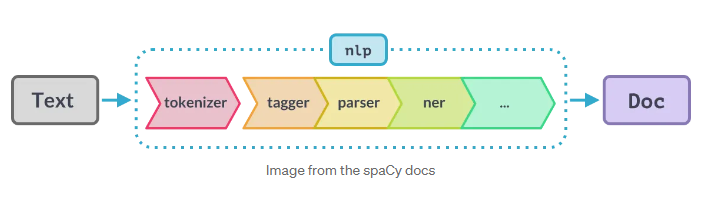

However spaCy doesn't have a custome pipeline for any NLP problem you might face in the real world. This means you may want to perform your preprocessing steps before the text is passed to other pipelines.

So we have to learn how to write custom pipeline functions and add them to the nlp object.

In [179]:
from spacy.language import Language
import string

@Language.component("your_component")
def your_component(doc):
    # do something on doc
    print(f'There are {len(doc)} tokens in this text.')
    words_without_punct = [word for word in doc if not word.is_punct]
#     print(words_without_punct)
    print(type(words_without_punct[0]))
    return doc
#     return words_without_punct

In [180]:
nlp.remove_pipe("your_component")
nlp.add_pipe("your_component")


<function __main__.your_component(doc)>

In [143]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'your_component']

In [184]:
doc = nlp("Bird dies, but you remember the flight.")
doc

There are 9 tokens in this text.
<class 'spacy.tokens.token.Token'>


Bird dies, but you remember the flight.

### Custom pipeline example

In [198]:
# Adds in the pipeline to identify Alexander the Great but doesn't correctly label it
from spacy.language import Language
from spacy.matcher import Matcher
from spacy.util import filter_spans

nlp = spacy.load("en_core_web_sm")

@Language.component("titled_person")
def titled_person(doc):
    pattern = [
        {"IS_ALPHA": True, "IS_TITLE": True},
        {"IS_STOP": True},
        {"IS_ALPHA": True, "IS_TITLE": True},
    ]
    # Create the matcher
    matcher = Matcher(nlp.vocab)
    # Add the pattern
    matcher.add("TITLED_PERSON", [pattern])

    matches = matcher(doc)
    matched_spans = [Span(doc, start, end, label="PERSON") for _, start, end in matches]

    # Filter the entities for potential overlap
    filtered_matches = filter_spans(list(doc.ents) + matched_spans)
    # Add the matched spans to doc's entities
    doc.ents = filtered_matches
    return doc

# nlp.remove_pipe("titled_person")
nlp.add_pipe("titled_person")
# <function __main__.titled_person(doc)>

<function __main__.titled_person(doc)>

In [197]:
txt = """Cleopatra wasn't actually Egyptian! 
         As far as historians can tell, Egypt's 
         famous femme fatal was actually Greek!. 
         She was a descendant of Alexander the Great's
         Macedonian general Ptolemy"""

doc = nlp(txt)

print(nlp.pipe_names)
print(doc.ents)

[Cleopatra, Egyptian, Egypt, Greek, Alexander the Great's, Macedonian, Ptolemy, Alexander the Great]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'titled_person']
(Cleopatra, Egyptian, Egypt, Greek, Alexander the Great's, Macedonian, Ptolemy)


In [190]:
# the add_pipe function has arguments to specify where to insert the function in the pipeline

nlp.add_pipe("titled_person", first=True)  # Beginning
nlp.add_pipe("titled_person", after="parser")  # After parser
nlp.add_pipe("titled_person", before="tagger") # Before POS tagger

ValueError: [E007] 'titled_person' already exists in pipeline. Existing names: ['tok2vec', 'tagger', 'parser', 'senter', 'attribute_ruler', 'lemmatizer', 'ner', 'titled_person']